In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [29]:
categorical = ['Channel','Region']
continous =['Fresh','Milk','Grocery', 'Frozen','Detergents_Paper','Delicassen']

In [30]:
for col in categorical:
    dummies = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummies],axis =1)
    data.drop(col,axis =1,inplace=True)

In [31]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [32]:
data.drop(['Channel_2','Region_3'],axis=1,inplace = True)

In [33]:
data.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Region_1,Region_2
435,29703,12051,16027,13135,182,2204,1,0,0
436,39228,1431,764,4510,93,2346,1,0,0
437,14531,15488,30243,437,14841,1867,0,0,0
438,10290,1981,2232,1038,168,2125,1,0,0
439,2787,1698,2510,65,477,52,1,0,0


## scaling the data

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)

MinMaxScaler()

In [35]:
transformed_data = min_max_scaler.transform(data)

In [37]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,0.0,0.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,0.0,0.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,0.0,0.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,1.0,0.0,0.0
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,1.0,0.0,0.0
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,0.0,0.0,0.0
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1.0,0.0,0.0


In [44]:
x = transformed_data
x

array([[0.11294004, 0.13072723, 0.08146416, ..., 0.        , 0.        ,
        0.        ],
       [0.06289903, 0.13282409, 0.10309667, ..., 0.        , 0.        ,
        0.        ],
       [0.05662161, 0.11918086, 0.08278992, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, ..., 0.        , 0.        ,
        0.        ],
       [0.091727  , 0.02622442, 0.02402535, ..., 1.        , 0.        ,
        0.        ],
       [0.02482434, 0.02237109, 0.02702178, ..., 1.        , 0.        ,
        0.        ]])

In [45]:
# Elblow method to find the value of K
from sklearn.cluster import KMeans

clusters = range(1,11)
wcss = []
for cluster in clusters:
    km = KMeans(n_clusters=cluster,random_state=0 )
    km.fit(x)
    wcss.append(km.inertia_)


In [46]:
wcss

[226.60151723193837,
 124.43915869969132,
 75.07473014024924,
 46.27853567405925,
 31.522871276092065,
 19.41892817972529,
 15.679164181072153,
 13.129100808295881,
 11.733181190386393,
 10.68158165945391]

Text(0, 0.5, 'wcss value')

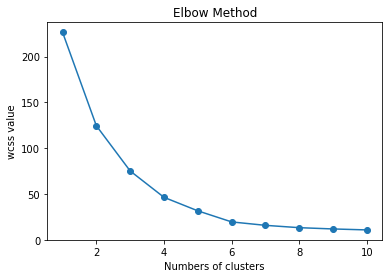

In [47]:
plt.plot(range(1,11), wcss, '-o')
plt.title('Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('wcss value')

In [48]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters = k)
    pred = km.fit_predict(x)
    
    score = silhouette_score(x,pred)
    print("For cluster ={},Silhoutte score is ={})".format(k,score))

For cluster =2,Silhoutte score is =0.5376563094806486)
For cluster =3,Silhoutte score is =0.6397282522870726)
For cluster =4,Silhoutte score is =0.7004431340986984)
For cluster =5,Silhoutte score is =0.7491712768585141)
For cluster =6,Silhoutte score is =0.791141364939208)
For cluster =7,Silhoutte score is =0.7837764184387308)
For cluster =8,Silhoutte score is =0.653543765975019)
For cluster =9,Silhoutte score is =0.5900807457203172)
For cluster =10,Silhoutte score is =0.5841040197173814)


Text(0, 0.5, 'Euclidean Distance')

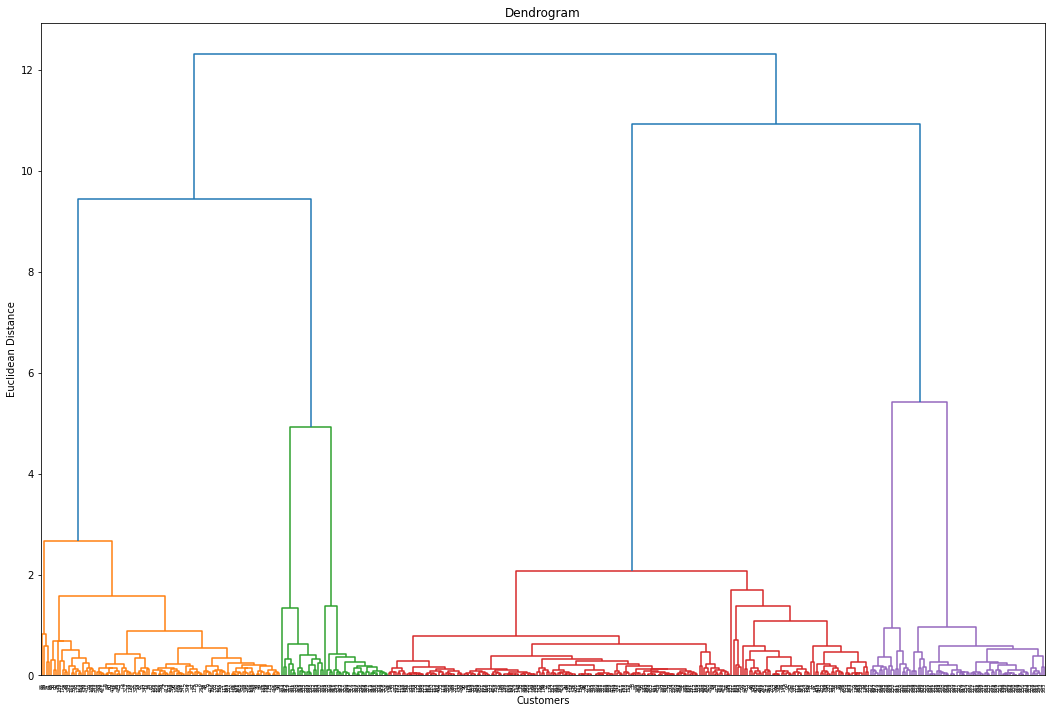

In [49]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(18,12))
dendrogram = sch.dendrogram(sch.linkage(x,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

In [51]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

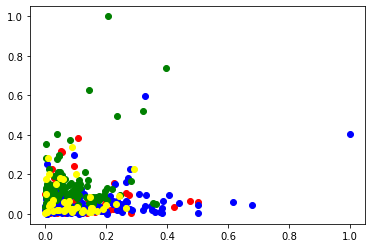

In [52]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], c='red' )
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], c='green')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], c='yellow')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1], c='black')

